# <center> Surprise Housing Assignment</center>

###### Submitted by - Sankar Thulasimani - <href> https://github.com/sankarthulasimani </href>

#### A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

### The company wants to know:

- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

#### Steps Followed for CRISP-DM approach:
- Data understanding
- Data Handling
- Exploratory Data Analysis
- Data Preprocessing
- Model Building
- Model Evaluation

## Importing libraries

In [101]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import os
from sklearn.metrics import r2_score,mean_squared_error
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)
%matplotlib inline

## STEP 1: Understanding the data

In [2]:
#Data reading from csv
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#Priting the shape and numerical stats
print(df.shape)
df.describe()

(1460, 81)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
df.info()
#Looking for null values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Some columns doesn't have data, so null values handed in next steps

## STEP 2: Data Handling

PoolQC         99.520548
MiscFeature    96.301370
Alley          93.767123
Fence          80.753425
FireplaceQu    47.260274
                 ...    
ExterQual       0.000000
Exterior2nd     0.000000
Exterior1st     0.000000
RoofMatl        0.000000
SalePrice       0.000000
Length: 81, dtype: float64


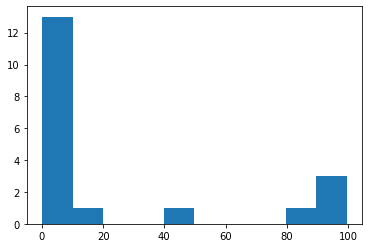

In [5]:
#Finding % of null values and their distribution to find the cleanup factor
per_null = round(100*(df.isnull().sum()/len(df.index)), 2)
plt.hist(per_null[per_null>0].sort_values(ascending= False))
print((100* df.isnull().sum()/len(df)).sort_values(ascending=False))

#### By sorting the missing columns are above 40% scale, which can be ignored and the columns with below 40% category can be handled based on analysis

In [6]:
#cleaning columns with null values greater than 40%
df.drop(per_null[per_null > 40].index, axis=1, inplace=True)
per_null = round(100*(df.isnull().sum()/len(df.index)), 2)
per_null[per_null>0].sort_values(ascending= False)

LotFrontage     17.74
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrType       0.55
MasVnrArea       0.55
Electrical       0.07
dtype: float64

In [7]:
#The numeric columns of missing value columns to check if there is a higher outlier data
df[['LotFrontage','MasVnrArea','GarageYrBlt']].describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


##### LoFrontage and MasvnrArea columns have outliers looking at the data

In [8]:
 #Treating missing values by imputing columns with median because of outlier
df['LotFrontage']= df.LotFrontage.fillna(df.LotFrontage.median()) 
df['MasVnrArea']= df.MasVnrArea.fillna(df.MasVnrArea.median())

#Treating missing values by imputing columns with mean, since it has no outlier
df['GarageYrBlt']= df.GarageYrBlt.fillna(df.GarageYrBlt.mean())

#checking null value percentage after imputing
per_null = round(100*(df.isnull().sum()/len(df.index)), 2)
per_null[per_null>0].sort_values(ascending= False)

GarageType      5.55
GarageFinish    5.55
GarageQual      5.55
GarageCond      5.55
BsmtExposure    2.60
BsmtFinType2    2.60
BsmtQual        2.53
BsmtCond        2.53
BsmtFinType1    2.53
MasVnrType      0.55
Electrical      0.07
dtype: float64

In [9]:
# As we have less percentage of missing data for other columns, dropping rows for the Null values
df.dropna(axis='rows', inplace=True)

#checking null percentage after removing
per_null = round(100*(df.isnull().sum()/len(df.index)), 2)
per_null.sort_values(ascending= False)

Id              0.0
FullBath        0.0
Fireplaces      0.0
Functional      0.0
TotRmsAbvGrd    0.0
               ... 
MasVnrType      0.0
Exterior2nd     0.0
Exterior1st     0.0
RoofMatl        0.0
SalePrice       0.0
Length: 76, dtype: float64

### All the null values are removed

### Outlier detection:

In [10]:
#Checking for outlier in the numerical columns
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.00000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.00000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,731.228700,56.136024,70.438714,10706.294469,6.219731,5.596413,1973.029148,1985.668909,110.360239,464.234679,49.218236,582.494768,1095.947683,1176.221973,357.141256,4.221973,1537.585202,0.438714,0.060538,1.575486,0.402840,2.864723,1.029895,6.550075,0.648729,1978.596413,1.87145,501.449925,99.384903,47.782511,21.263827,3.585949,16.43423,3.010463,42.932735,6.331839,2007.805680,186761.782511
std,421.779691,41.252576,22.170305,10336.621126,1.324472,1.078124,29.563540,20.296463,185.604816,458.792420,166.196584,439.950528,405.554435,386.644986,440.324982,40.712916,520.579960,0.515630,0.241685,0.547570,0.504185,0.776677,0.174697,1.585071,0.645393,24.773741,0.63428,186.761863,127.537065,65.362562,60.843964,30.224622,58.05159,41.961337,508.056255,2.699437,1.330691,78913.847668
min,1.000000,20.000000,21.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,105.000000,438.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1900.000000,1.00000,160.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,366.250000,20.000000,60.000000,7744.000000,5.000000,5.000000,1956.000000,1968.000000,0.000000,0.000000,0.000000,248.000000,819.750000,894.000000,0.000000,0.000000,1160.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.00000,377.500000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,5.000000,2007.000000,135000.000000
50%,730.500000,50.000000,69.000000,9600.000000,6.000000,5.000000,1976.000000,1994.500000,0.000000,413.000000,0.000000,489.000000,1021.500000,1098.000000,0.000000,0.000000,1480.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.00000,484.000000,6.000000,28.000000,0.000000,0.000000,0.00000,0.000000,0.000000,6.000000,2008.000000,168500.000000
75%,1098.750000,70.000000,80.000000,11760.750000,7.000000,6.000000,2001.000000,2004.000000,174.000000,733.000000,0.000000,815.750000,1324.000000,1414.000000,740.500000,0.000000,1791.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.00000,583.000000,174.500000,70.000000,0.000000,0.000000,0.00000,0.000000,0.000000,8.000000,2009.000000,220000.000000
90%,1314.300000,120.000000,93.000000,14575.900000,8.000000,7.000000,2006.000000,2007.000000,340.000000,1079.900000,134.100000,1242.700000,1616.300000,1686.300000,975.600000,0.000000,2175.300000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,2006.000000,3.00000,772.600000,264.300000,130.000000,109.200000,0.000000,0.00000,0.000000,0.000000,10.000000,2010.000000,283624.100000
95%,1388.150000,160.000000,105.000000,17508.850000,8.000000,8.000000,2007.000000,2007.000000,464.300000,1280.300000,412.350000,1480.300000,1754.500000,1838.150000,1151.150000,0.000000,2485.300000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,10.000000,2.000000,2007.000000,3.00000,857.150000,342.300000,172.300000,180.450000,0.000000,168.00000,0.000000,0.000000,11.000000,2010.000000,335000.000000
99%,1443.630000,1

In [11]:
#Common function to remove outliers in numerical columns above 95th percentile
def remove_outliers(x,y):
    q1 = x[y].quantile(0.05)
    q3 = x[y].quantile(0.95)
    value = q3-q1
    lower_value  = q1-1.5*value
    higer_value = q3+1.5*value
    out= x[(x[y]<higer_value) & (x[y]>lower_value)]
    return out

## STEP 3: Exploratory Data Analysis

### Handling outlier based on EDA

##### Visulaizing columns with outliers:

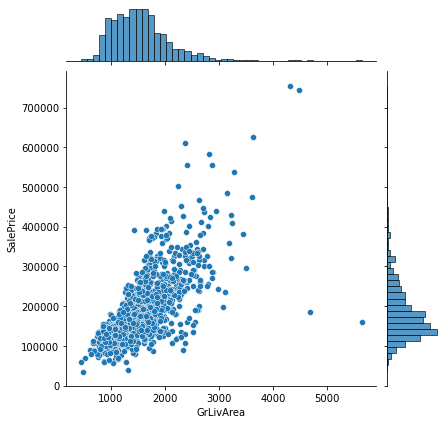

In [12]:
#Plotting numeric columns with outliers
sns.jointplot(x='GrLivArea', y='SalePrice', data=df)
plt.show()

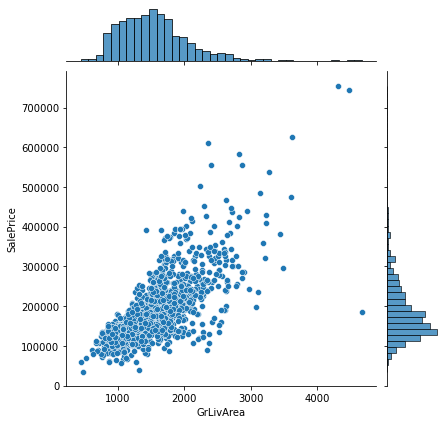

In [13]:
# Removing outliers on lower right side of 'GrLivArea'
df = remove_outliers(df,'GrLivArea')
sns.jointplot(x='GrLivArea', y='SalePrice', data=df)

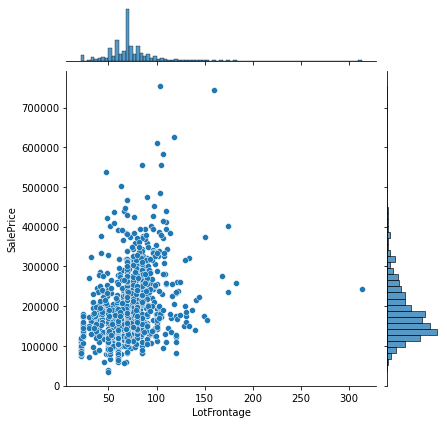

In [14]:
# Lot frontage vs SalePrice 
sns.jointplot(x = df['LotFrontage'], y = df['SalePrice'])
plt.show()

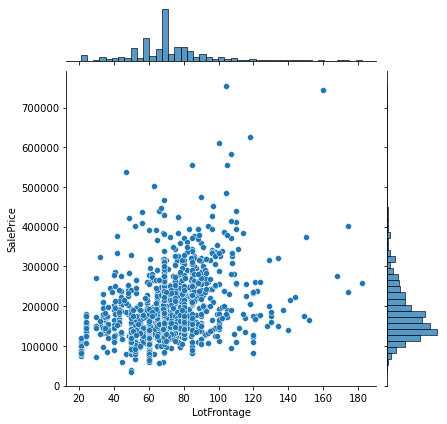

In [15]:
# Removing outliers on lower right side of 'LotFrontage'
df = remove_outliers(df,'LotFrontage')
sns.jointplot(x='LotFrontage', y='SalePrice', data=df)

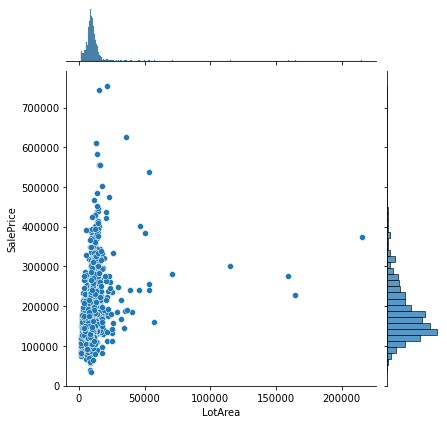

In [16]:
# LotArea vs SalePrice
sns.jointplot(x = df['LotArea'], y = df['SalePrice'])
plt.show()

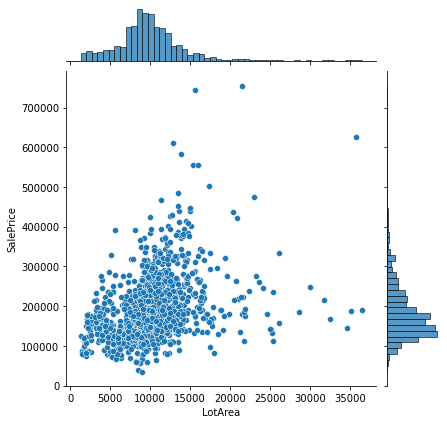

In [17]:
# Removing outliers on lower right side of 'LotArea'
df = remove_outliers(df,'LotArea')
sns.jointplot(x='LotArea', y='SalePrice', data=df)

In [18]:
#creating a function for jointplot, to compare other few numerical columns vs sale price
def jointplotter(col):
    for i,c in enumerate(col,1):
        sns.jointplot(x = c, y ='SalePrice', data = df)

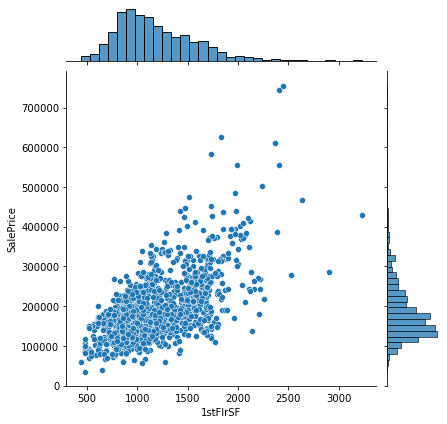

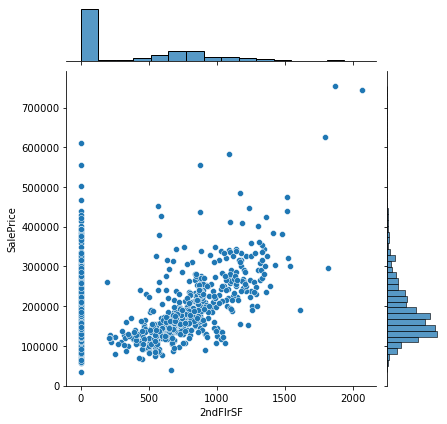

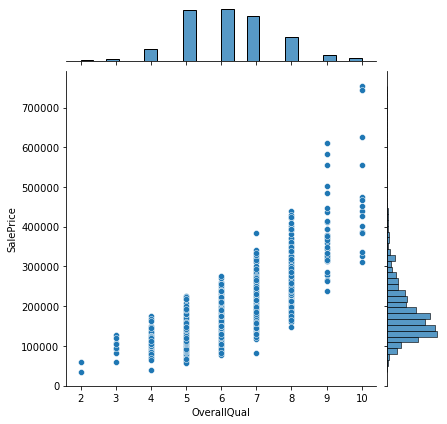

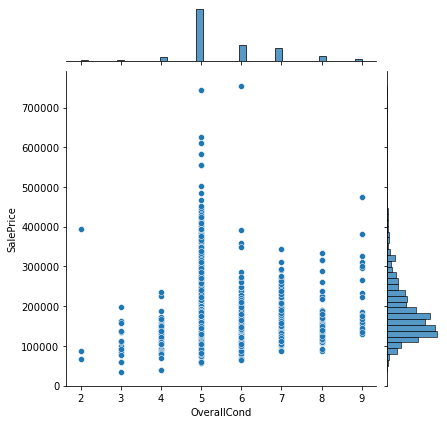

In [19]:
cols = ['1stFlrSF','2ndFlrSF','OverallQual','OverallCond']
jointplotter(cols)

### Below are the observations
- No major outliers observed 
- The flooring & sale price have a linear relationship

In [20]:
#Checking for percentiles in the numerical columns again
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000
mean,732.768533,56.248109,70.007564,9886.515885,6.210287,5.593797,1973.048411,1985.594554,109.039334,454.231467,47.889561,585.009077,1087.130106,1167.256430,355.691377,4.273071,1527.220877,0.430408,0.060514,1.571861,0.403177,2.863843,1.030257,6.534039,0.636157,1978.669440,1.866868,499.652042,97.141452,47.233737,21.483359,3.629349,16.341906,2.683812,42.544629,6.323752,2007.804841,185608.975038
std,422.199915,41.240608,19.999317,4214.681315,1.317081,1.078616,29.611296,20.313677,183.402665,430.537334,163.170424,440.630680,375.919012,368.807521,438.386122,40.956065,499.495007,0.508890,0.241680,0.543124,0.504414,0.771115,0.175721,1.566340,0.635793,24.767023,0.634946,185.028970,123.571175,64.328893,61.163870,30.404520,57.970139,40.120294,510.629879,2.695418,1.332540,77966.201244
min,1.000000,20.000000,21.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,105.000000,438.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1900.000000,1.000000,160.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,367.250000,20.000000,60.000000,7700.000000,5.000000,5.000000,1956.000000,1968.000000,0.000000,0.000000,0.000000,252.000000,817.250000,894.000000,0.000000,0.000000,1154.250000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,372.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,135000.000000
50%,733.500000,50.000000,69.000000,9571.500000,6.000000,5.000000,1976.000000,1994.000000,0.000000,405.000000,0.000000,490.000000,1015.000000,1096.000000,0.000000,0.000000,1477.500000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,484.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,167950.000000
75%,1100.750000,70.000000,80.000000,11638.500000,7.000000,6.000000,2001.000000,2004.000000,173.500000,730.250000,0.000000,816.000000,1313.250000,1392.000000,739.000000,0.000000,1785.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,582.750000,171.000000,69.750000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,217000.000000
90%,1314.900000,120.000000,92.000000,14199.100000,8.000000,7.000000,2006.000000,2006.000000,336.900000,1063.500000,124.800000,1251.700000,1604.000000,1678.600000,974.100000,0.000000,2160.700000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,2006.000000,3.000000,769.800000,264.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,280900.000000
95%,1387.950000,160.000000,103.950000,16559.250000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1273.800000,399.800000,1481.900000,1745.800000,1827.900000,1142.000000,0.000000,2467.900000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,9.950000,2.000000,2007.000000,3.000000,855.850000,334.900000,170.000000,182.850000,0.000000,167.850000,0.000000,0.000000,11.000000,2010.000000,328855.000000
99

### Below are the observations
- Except few features no major outliers observed
- we can avoid them as we have lesser data

### Creating Derived Variables

In [21]:
# Converting dates (YearBuilt, YearRemodAdd, GarageYrBlt) to days (DiffYearBuilt, DiffYearRemodAdd, DiffGarageYrBlt) from today
df['current_age'] = pd.datetime.now().year - df['YearBuilt']
df['remod_age'] = pd.datetime.now().year - df['YearRemodAdd']
df['garage_age'] = pd.datetime.now().year - df['GarageYrBlt']
df['selling_Age'] = df['YrSold'] - df['YearBuilt']

#dropping columns since we have derived data from them
df = df.drop(['MoSold'], axis = 1)
df = df.drop(['YrSold'], axis = 1)
df = df.drop(['YearBuilt'], axis = 1)
df = df.drop(['YearRemodAdd'], axis = 1)

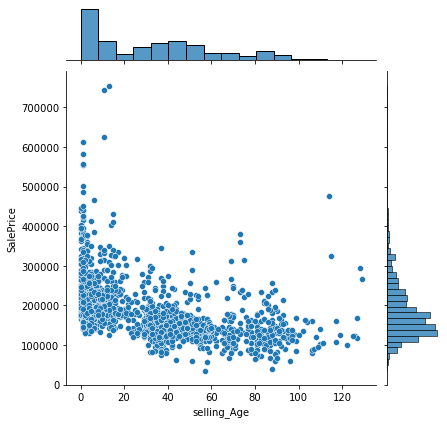

In [22]:
# Plotting selling age vs SalePrice
jointplotter(['selling_Age'])
plt.show()

### Below are the observations
- No major outliers observed
- selling age has a linear relationship and the sale price decreases with increase in age

#### Data Variance

In [23]:
df.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,current_age,remod_age,garage_age,selling_Age
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,WD,Normal,208500,19,19,19.0,5
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,WD,Normal,181500,46,46,46.0,31
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,WD,Normal,223500,21,20,21.0,7
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,WD,Abnorml,140000,107,52,24.0,91
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,WD,Normal,250000,22,22,22.0,8
5,6,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,700,WD,Normal,143000,29,27,29.0,16
6,7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,0,WD,Normal,307000,18,17,18.0,3
7,8,60,RL,69.0,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,350,WD,Normal,200000,49,49,49.0,36
8,9,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,0,WD,Abnorml,129900,91,72,91.0,77
9,10,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,Attchd,1939.0,RFn,1,205,Gd,TA,Y,0,4,0,0,0,0,0,WD,Normal,118000,83,72,83.0,69


In [24]:
#checking uniqueness of few columns on suspicion
cols = ['Street','Utilities','MiscVal', 'RoofMatl', 'Condition2', 'Heating', 'GarageCond', 'Functional' ]
for col in cols:
    print(df[col].value_counts())
    print('\n')

Pave    1318
Grvl       4
Name: Street, dtype: int64


AllPub    1321
NoSeWa       1
Name: Utilities, dtype: int64


0        1277
400        10
500         6
700         4
600         4
2000        4
450         3
480         2
2500        1
350         1
560         1
54          1
620         1
8300        1
800         1
1150        1
15500       1
1200        1
1300        1
1400        1
Name: MiscVal, dtype: int64


CompShg    1304
Tar&Grv       7
WdShake       5
WdShngl       4
Metal         1
Roll          1
Name: RoofMatl, dtype: int64


Norm      1309
Feedr        5
Artery       2
RRNn         2
PosN         1
RRAn         1
PosA         1
RRAe         1
Name: Condition2, dtype: int64


GasA    1303
GasW      15
Grav       3
OthW       1
Name: Heating, dtype: int64


TA    1271
Fa      33
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64


Typ     1242
Min2      30
Min1      26
Maj1      10
Mod        9
Maj2       4
Sev        1
Name: Functional, dtype: int64



In [25]:
#All columns from the above list can be removed as they have almost same values
df = df.drop(cols,axis=1)
print(df.shape)
df.head()

(1322, 68)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SaleType,SaleCondition,SalePrice,current_age,remod_age,garage_age,selling_Age
0,1,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,Attchd,2003.0,RFn,2,548,TA,Y,0,61,0,0,0,0,WD,Normal,208500,19,19,19.0,5
1,2,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,Attchd,1976.0,RFn,2,460,TA,Y,298,0,0,0,0,0,WD,Normal,181500,46,46,46.0,31
2,3,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,Attchd,2001.0,RFn,2,608,TA,Y,0,42,0,0,0,0,WD,Normal,223500,21,20,21.0,7
3,4,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Detchd,1998.0,Unf,3,642,TA,Y,0,35,272,0,0,0,WD,Abnorml,140000,107,52,24.0,91
4,5,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,Attchd,2000.0,RFn,3,836,TA,Y,192,84,0,0,0,0,WD,Normal,250000,22,22,22.0,8


In [26]:
# Drop 'Id' from Dataframe

df = df.drop(['Id'],axis=1)
print(df.shape)
df.head()

(1322, 67)


,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SaleType,SaleCondition,SalePrice,current_age,remod_age,garage_age,selling_Age
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,Attchd,2003.0,RFn,2,548,TA,Y,0,61,0,0,0,0,WD,Normal,208500,19,19,19.0,5
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,Attchd,1976.0,RFn,2,460,TA,Y,298,0,0,0,0,0,WD,Normal,181500,46,46,46.0,31
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,Attchd,2001.0,RFn,2,608,TA,Y,0,42,0,0,0,0,WD,Normal,223500,21,20,21.0,7
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Detchd,1998.0,Unf,3,642,TA,Y,0,35,272,0,0,0,WD,Abnorml,140000,107,52,24.0,91
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,Attchd,2000.0,RFn,3,836,TA,Y,192,84,0,0,0,0,WD,Normal,250000,22,22,22.0,8


In [27]:
#type of each feature in data: int, float, object
types = df.dtypes
#numerical values are either type int or float
numeric_type = types[(types == 'int64') | (types == float)] 
#categorical values are type object
categorical_type = types[types == object]

#Numerical columns
num_col = list(numeric_type.index)
print('Numerical Col:\n',num_col,'\n')

#Categorical columns
cat_col = list(categorical_type.index)
print('Categorical Col:\n',cat_col)

Numerical Col:
 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'SalePrice', 'current_age', 'remod_age', 'garage_age', 'selling_Age'] 

Categorical Col:
 ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive', 'SaleType', 'SaleCondition']


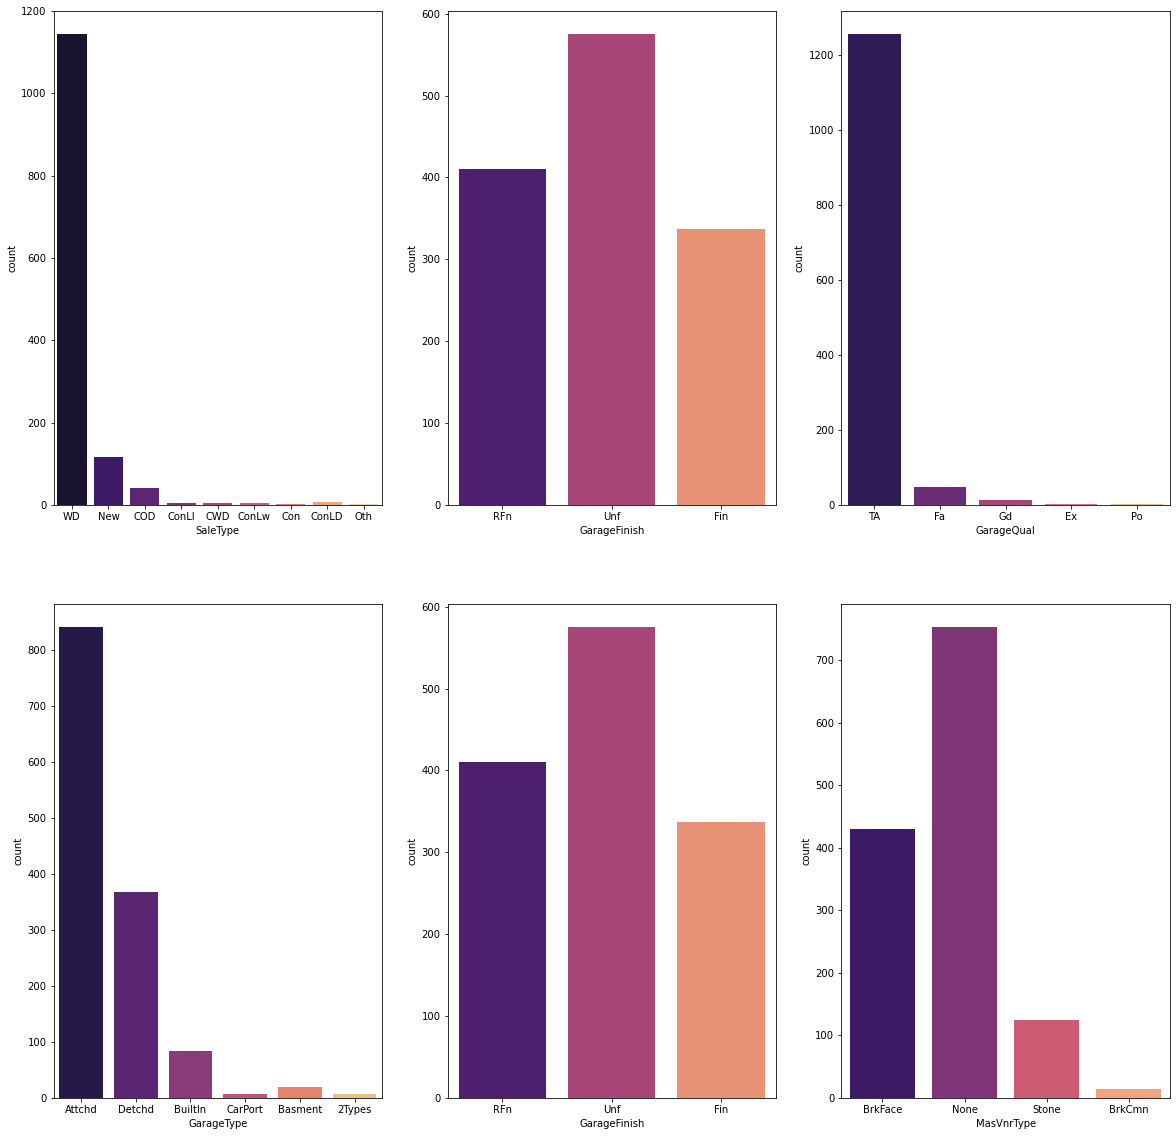

In [28]:
#Plotting few categorical columns

plt.figure(figsize=(20, 20))
plt.subplot(2,3,1)
sns.countplot(x = 'SaleType',  data = df,palette = 'magma')

plt.subplot(2,3,2)
sns.countplot(x = 'GarageFinish',  data = df,palette = 'magma')

plt.subplot(2,3,3)
sns.countplot(x = 'GarageQual', data = df,palette = 'magma')

plt.subplot(2,3,4)
sns.countplot(x = 'GarageType', data = df,palette = 'magma')

plt.subplot(2,3,5)
sns.countplot(x = 'GarageFinish',  data = df,palette = 'magma')

plt.subplot(2,3,6)
sns.countplot(x = 'MasVnrType', data = df,palette = 'magma')
plt.show()

### Below are the observations:
- Houses with no Masonry veneer has more sales record
- Garage type has more sales count
- Warranty Deed Sales are higher
- Unfinished Garage has little higher sales count
- Average Quality Garage has more sales count

### Plotting all Categorical Columns

In [29]:
#creating a function for boxplots, to compare the distribution of categorical columns vs sale price
def boxplotter(col):
    for i,c in enumerate(col,1):
        ax=plt.subplot(25,2,i)
        plt.xticks(rotation=90)
        sns.boxplot(x = c, y ='SalePrice', data = df,ax=ax)

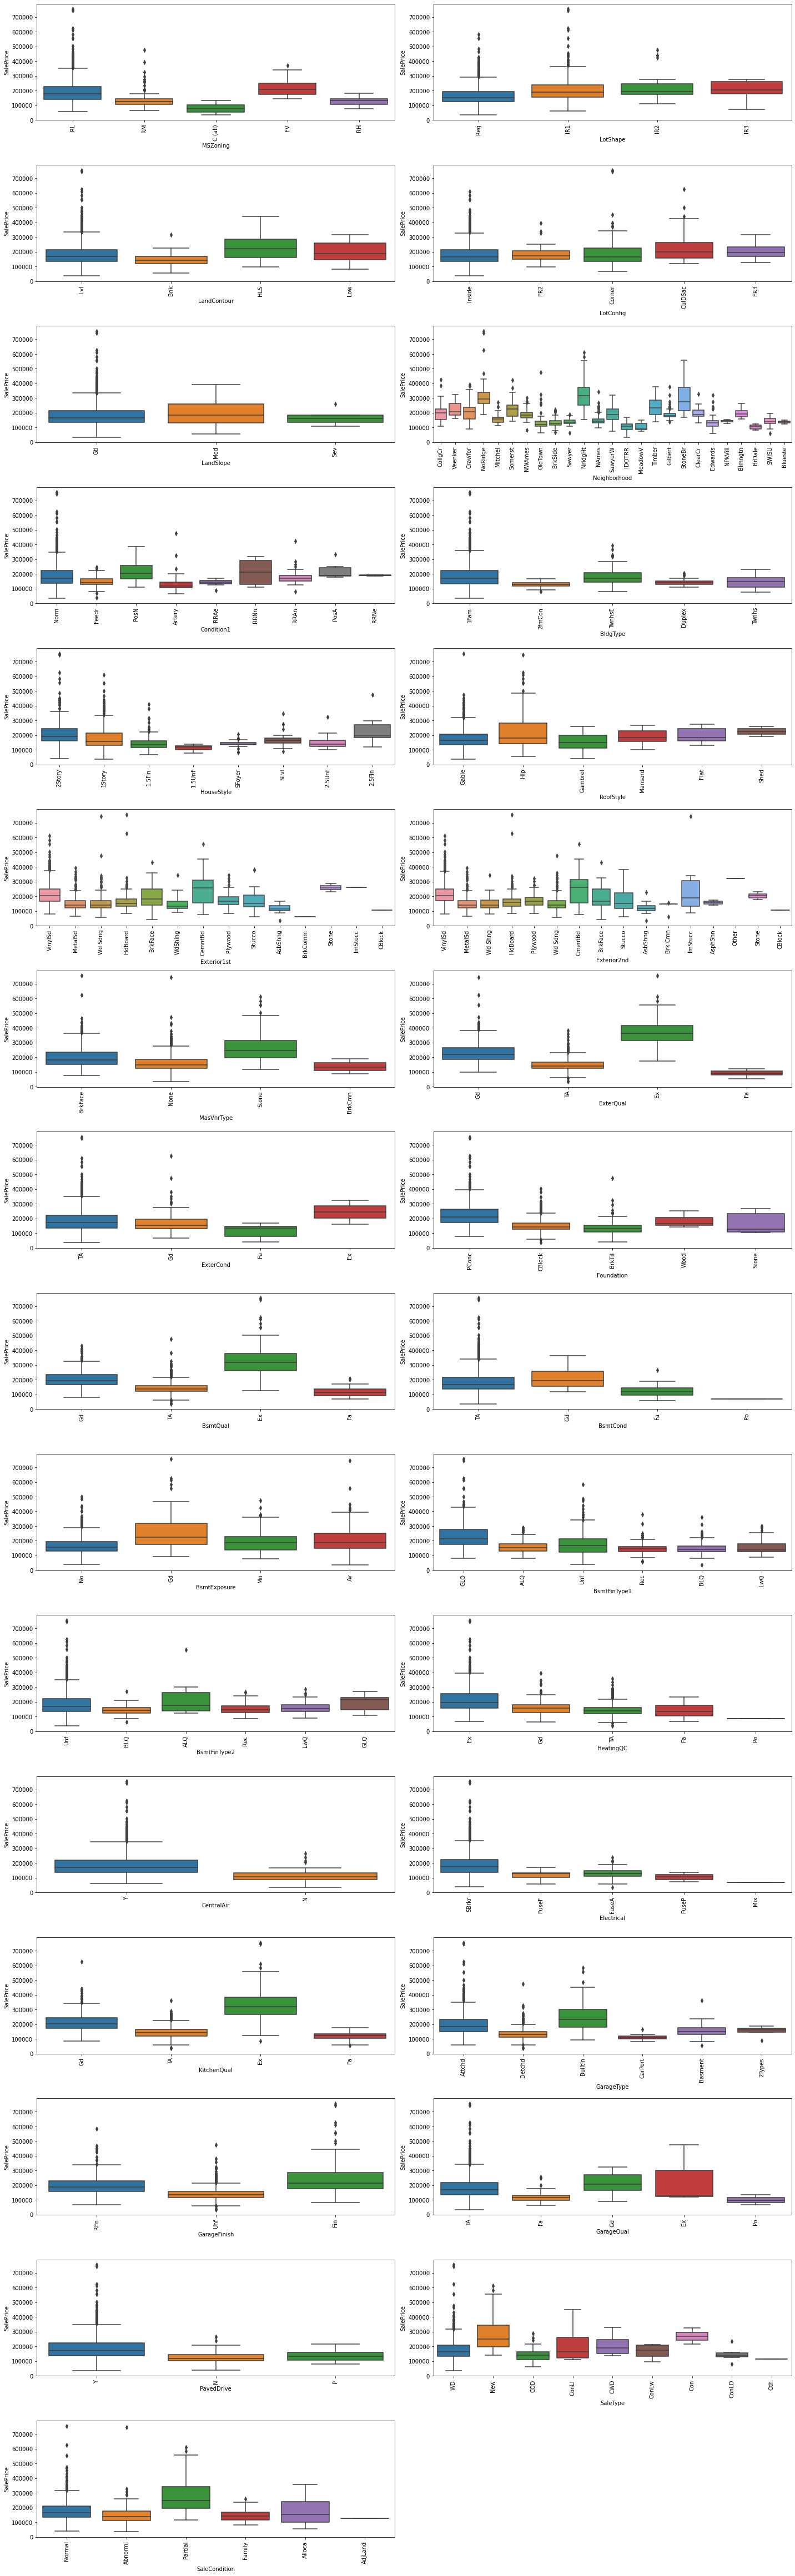

In [30]:
#Plotting boxplots of all categorical columns
plt.figure(figsize=(20,100))
boxplotter(cat_col)
plt.tight_layout()
plt.show()

### Below are the observations:
- Poured Contrete foundation are the highest in number
- Price of Poured Contrete Foundation is highest.
- Price of Excellent ExterQual and HeatingQc is highest
- Majority of ExterQual, ExerCond is TA


<AxesSubplot:>

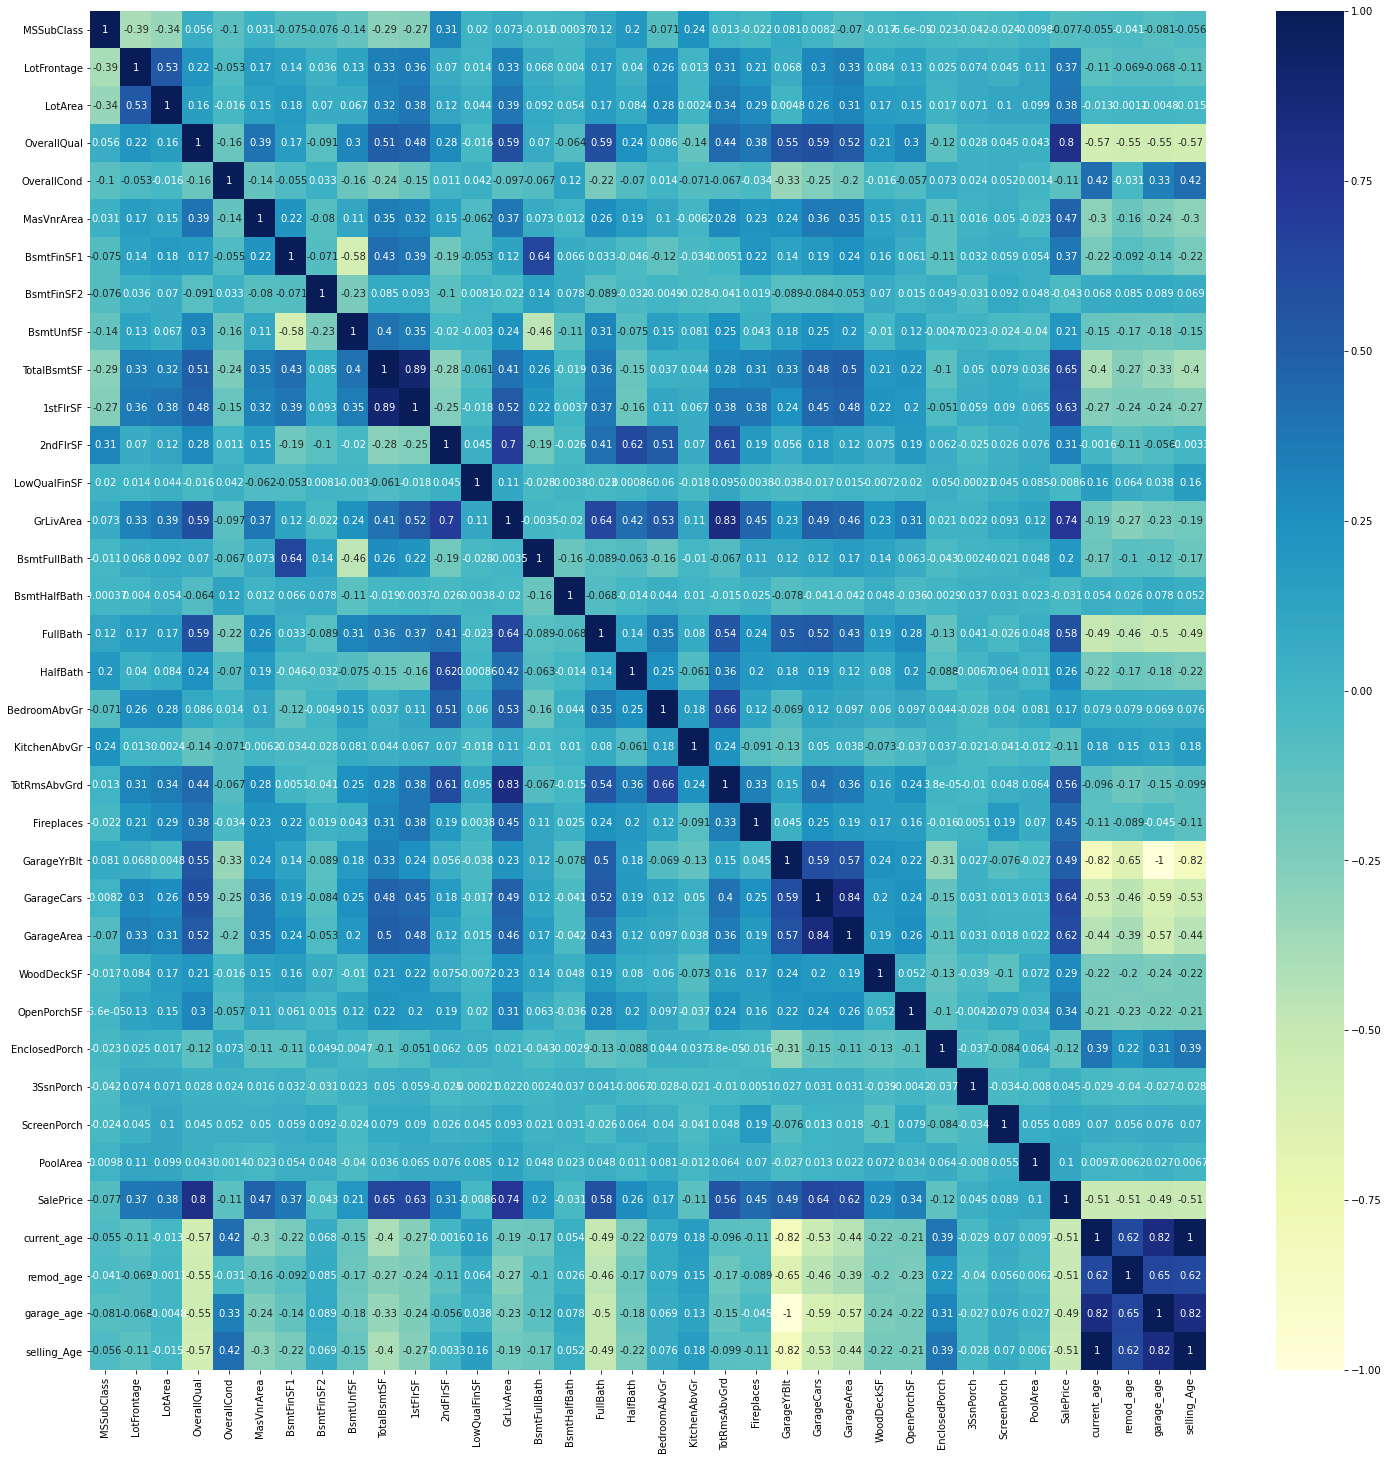

In [31]:
#creating correlation matrix and heatmap
corr_mat = df.corr()
plt.figure(figsize=(25, 25))
sns.heatmap(corr_mat,annot= True,cmap="YlGnBu")

### Below are the observations
- Derived variable selling age and other ages are negatively correlated with sale price, indicating increase in age reduces the pruce
- Overalqual is the highest correlated variable with saleprice
- Total basement, 1st floor, fullbath, garage finish are also highly correlated with saleprice
- Few multicollinearity found

In [32]:
#filtering out highly correlated features (more than 0.5 correlation) with dependent variable
corr_features = corr_mat[abs(corr_mat['SalePrice']) > 0.5]['SalePrice'].sort_values(ascending=False)
print(corr_features[1:])
corr_cols = [i for i in corr_features.index]

OverallQual     0.795054
GrLivArea       0.739458
TotalBsmtSF     0.646982
GarageCars      0.640330
1stFlrSF        0.630175
GarageArea      0.615792
FullBath        0.577952
TotRmsAbvGrd    0.558958
remod_age      -0.507196
current_age    -0.513327
selling_Age    -0.513748
Name: SalePrice, dtype: float64


<Figure size 3600x4320 with 0 Axes>

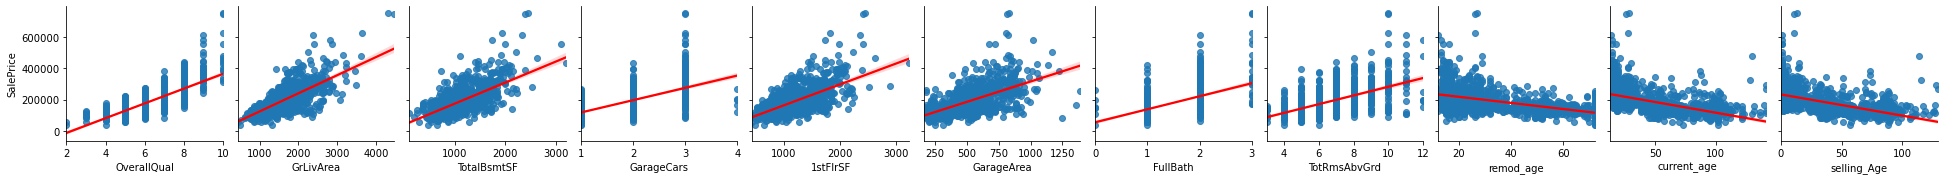

In [33]:
# Analysing the highly correlated columns
plt.figure(figsize = (50,60))

sns.pairplot(data=df,x_vars=corr_cols[1:],y_vars=corr_cols[0], kind ='reg',plot_kws={'line_kws':{'color':'red'}})
plt.show()

## STEP 4: Data Preprocessing

#### Creating Dummy Variables for Categorical Columns

In [34]:
#creating dummy variables for all categorical columns
dummies = pd.get_dummies(df[cat_col], drop_first = True)

# Add the results to the original housing dataframe
df = pd.concat([df, dummies], axis = 1)

#dropping the orginal columns since we created dummies
df.drop(cat_col, axis = 1, inplace = True)

df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SalePrice,current_age,remod_age,garage_age,selling_Age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,...,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,208500,19,19,19.0,5,0,0,1,0,0,0,1,0,0,1,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,181500,46,46,46.0,31,0,0,1,0,0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,223500,21,20,21.0,7,0,0,1,0,0,0,0,0,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,140000,107,52,24.0,91,0,0,1,0,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,250000,22,22,22.0,8,0,0,1,0,0,0,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [35]:
#The shape of final dataset
df.shape

(1322, 198)

#### Target Variable

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

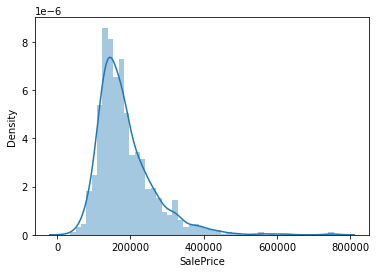

In [36]:
#The Target Variable
sns.distplot(df['SalePrice'])

 ### Skewed towards left, a log transformation can be used

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

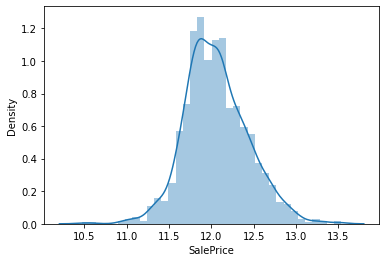

In [37]:
#Log Transformation
df['SalePrice']=np.log1p(df['SalePrice'])

#Looking at the Target Variable after transformation
sns.distplot(df['SalePrice'])

In [38]:
df_train, df_test = train_test_split(df, train_size=0.8, random_state=100)
df_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SalePrice,current_age,remod_age,garage_age,selling_Age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,...,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
42,85,69.0,9180,5,7,0.0,747,93,0,840,884,0,0,884,1,0,1,0,2,1,5,0,1983.0,2,504,240,0,0,0,0,0,11.877576,39,39,39.0,24,0,0,1,0,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
23,120,44.0,4224,5,7,0.0,840,0,200,1040,1060,0,0,1060,1,0,1,0,3,1,6,1,1976.0,2,572,100,110,0,0,0,0,11.774528,46,46,46.0,31,0,0,0,1,0,0,1,0,0,1,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
16,20,69.0,11241,6,7,180.0,578,0,426,1004,1004,0,0,1004,1,0,1,0,2,1,5,1,1970.0,2,480,0,0,0,0,0,0,11.911708,52,52,52.0,40,0,0,1,0,0,0,0,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
471,60,92.0,11952,7,6,0.0,0,0,808,808,1161,808,0,1969,0,0,2,1,3,1,8,1,1977.0,2,534,0,0,0,0,276,0,12.154785,45,45,45.0,30,0,0,1,0,0,0,1,0,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
760,20,70.0,9100,6,6,0.0,612,0,252,864,864,0,0,864,0,0,1,0,2,1,5,0,2008.0,1,300,0,0,0,0,0,0,11.755879,63,63,14.0,50,0,0,1,0,0,0,1,0,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


#### Scaling:

In [39]:
#scaling using standard scaler
scaler = StandardScaler()

#scaling training dataset
df_train[num_col] = scaler.fit_transform(df_train[num_col])

#scaling test dataset (Only transform will be used for test dataset)
df_test[num_col] = scaler.transform(df_test[num_col])

#looking at the data after scaling
df_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SalePrice,current_age,remod_age,garage_age,selling_Age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,...,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
42,0.686652,-0.050276,-0.148385,-0.936031,1.327640,-0.626888,0.650667,0.280315,-1.318808,-0.660328,-0.762212,-0.812605,-0.106703,-1.300443,1.122203,-0.251881,-1.069156,-0.795175,-1.132711,-0.170913,-0.992448,-1.021924,0.172187,0.203655,0.038885,1.162792,-0.726603,-0.353943,-0.119796,-0.284951,-0.068679,-0.503355,-0.319954,0.125430,-0.172187,-0.348165,0,0,1,0,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
23,1.536810,-1.289581,-1.357882,-0.936031,1.327640,-0.626888,0.865149,-0.286443,-0.864061,-0.136030,-0.287014,-0.812605,-0.106703,-0.941540,1.122203,-0.251881,-1.069156,-0.795175,0.184424,-0.170913,-0.337222,0.554972,-0.110612,0.203655,0.405810,0.014028,1.008285,-0.353943,-0.119796,-0.284951,-0.068679,-0.782705,-0.082054,0.469921,0.110612,-0.110322,0,0,0,1,0,0,1,0,0,1,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
16,-0.892211,-0.050276,0.354595,-0.175551,1.327640,0.395140,0.260910,-0.286443,-0.350198,-0.230403,-0.438213,-0.812605,-0.106703,-1.055736,1.122203,-0.251881,-1.069156,-0.795175,-1.132711,-0.170913,-0.992448,0.554972,-0.353012,0.203655,-0.090618,-0.806518,-0.726603,-0.353943,-0.119796,-0.284951,-0.068679,-0.410825,0.121860,0.765198,0.353012,0.195475,0,0,1,0,0,0,0,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
471,0.079397,1.089885,0.528113,0.584930,0.390222,-0.626888,-1.072105,-0.286443,0.518368,-0.744216,-0.014315,1.058820,-0.106703,0.912116,-0.858045,-0.251881,0.783463,1.191822,0.184424,-0.170913,0.973231,0.554972,-0.070213,0.203655,0.200763,-0.806518,-0.726603,-0.353943,-0.119796,4.344151,-0.068679,0.248126,-0.116040,0.420708,0.070213,-0.144300,0,0,1,0,0,0,1,0,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
760,-0.892211,-0.000703,-0.167909,-0.175551,0.390222,-0.626888,0.339323,-0.286443,-0.745827,-0.597412,-0.816211,-0.812605,-0.106703,-1.341228,-0.858045,-0.251881,-1.069156,-0.795175,-1.132711,-0.170913,-0.992448,-1.021924,1.182185,-1.345003,-1.061892,-0.806518,-0.726603,-0.353943,-0.119796,-0.284951,-0.068679,-0.833259,0.495702,1.306541,-1.182185,0.535250,0,0,1,0,0,0,1,0,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [40]:
#seperating target and independent features
# Creating X and y
y_train = df_train.pop('SalePrice')
X_train = df_train

y_test = df_test.pop('SalePrice')
X_test = df_test

In [41]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,current_age,remod_age,garage_age,selling_Age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,...,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
42,0.686652,-0.050276,-0.148385,-0.936031,1.327640,-0.626888,0.650667,0.280315,-1.318808,-0.660328,-0.762212,-0.812605,-0.106703,-1.300443,1.122203,-0.251881,-1.069156,-0.795175,-1.132711,-0.170913,-0.992448,-1.021924,0.172187,0.203655,0.038885,1.162792,-0.726603,-0.353943,-0.119796,-0.284951,-0.068679,-0.319954,0.125430,-0.172187,-0.348165,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
23,1.536810,-1.289581,-1.357882,-0.936031,1.327640,-0.626888,0.865149,-0.286443,-0.864061,-0.136030,-0.287014,-0.812605,-0.106703,-0.941540,1.122203,-0.251881,-1.069156,-0.795175,0.184424,-0.170913,-0.337222,0.554972,-0.110612,0.203655,0.405810,0.014028,1.008285,-0.353943,-0.119796,-0.284951,-0.068679,-0.082054,0.469921,0.110612,-0.110322,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
16,-0.892211,-0.050276,0.354595,-0.175551,1.327640,0.395140,0.260910,-0.286443,-0.350198,-0.230403,-0.438213,-0.812605,-0.106703,-1.055736,1.122203,-0.251881,-1.069156,-0.795175,-1.132711,-0.170913,-0.992448,0.554972,-0.353012,0.203655,-0.090618,-0.806518,-0.726603,-0.353943,-0.119796,-0.284951,-0.068679,0.121860,0.765198,0.353012,0.195475,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
471,0.079397,1.089885,0.528113,0.584930,0.390222,-0.626888,-1.072105,-0.286443,0.518368,-0.744216,-0.014315,1.058820,-0.106703,0.912116,-0.858045,-0.251881,0.783463,1.191822,0.184424,-0.170913,0.973231,0.554972,-0.070213,0.203655,0.200763,-0.806518,-0.726603,-0.353943,-0.119796,4.344151,-0.068679,-0.116040,0.420708,0.070213,-0.144300,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
760,-0.892211,-0.000703,-0.167909,-0.175551,0.390222,-0.626888,0.339323,-0.286443,-0.745827,-0.597412,-0.816211,-0.812605,-0.106703,-1.341228,-0.858045,-0.251881,-1.069156,-0.795175,-1.132711,-0.170913,-0.992448,-1.021924,1.182185,-1.345003,-1.061892,-0.806518,-0.726603,-0.353943,-0.119796,-0.284951,-0.068679,0.495702,1.306541,-1.182185,0.535250,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


## STEP 5: Model Building

### 1) General Approach - Checking the possibility of Linear regression without regularization

### Recursive Feature Elimination for Feature Selection

In [42]:
#building a model
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE for top 50 variables
rfe = RFE(lm, 50)            
rfe = rfe.fit(X_train, y_train)

# Checking the ranks
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 70),
 ('LotFrontage', False, 110),
 ('LotArea', False, 39),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 124),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 102),
 ('BsmtHalfBath', False, 132),
 ('FullBath', False, 138),
 ('HalfBath', False, 119),
 ('BedroomAbvGr', False, 135),
 ('KitchenAbvGr', False, 147),
 ('TotRmsAbvGrd', False, 86),
 ('Fireplaces', False, 88),
 ('GarageYrBlt', True, 1),
 ('GarageCars', False, 25),
 ('GarageArea', False, 80),
 ('WoodDeckSF', False, 98),
 ('OpenPorchSF', False, 82),
 ('EnclosedPorch', False, 130),
 ('3SsnPorch', False, 113),
 ('ScreenPorch', False, 79),
 ('PoolArea', False, 127),
 ('current_age', False, 100),
 ('remod_age', False, 76),
 ('garage_age', True, 1),
 ('selling_Age', True, 1),
 ('MSZoning_FV', True, 1),


In [43]:
##assigning the top 50 columns
rfe_cols = X_train.columns[rfe.support_]
rfe_cols

Index(['OverallQual', 'OverallCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'GarageYrBlt', 'garage_age', 'selling_Age', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'LandSlope_Sev', 'Neighborhood_ClearCr',
       'Neighborhood_Crawfor', 'Neighborhood_IDOTRR', 'Neighborhood_NridgHt',
       'Neighborhood_Veenker', 'Condition1_Norm', 'Condition1_PosN',
       'BldgType_Duplex', 'BldgType_Twnhs', 'RoofStyle_Mansard',
       'RoofStyle_Shed', 'Exterior1st_BrkFace', 'Exterior1st_CBlock',
       'Exterior1st_CemntBd', 'Exterior2nd_BrkFace', 'Exterior2nd_CBlock',
       'Exterior2nd_CmentBd', 'Foundation_PConc', 'Foundation_Stone',
       'Foundation_Wood', 'BsmtExposure_Gd', 'CentralAir_Y',
       'Electrical_FuseF', 'KitchenQual_Fa', 'KitchenQual_Gd', 'GarageQual_Gd',
       'GarageQual_TA', 'SaleType_Con', 'SaleType_ConLI', 'SaleType_New',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca',
     

In [44]:
# Creating X_train and X_test from RFE columns
X_train_rfe = X_train[rfe_cols]
X_test_rfe = X_test[rfe_cols]
X_train_rfe.head()

,OverallQual,OverallCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,garage_age,selling_Age,MSZoning_FV,MSZoning_RH,MSZoning_RL,LandSlope_Sev,Neighborhood_ClearCr,Neighborhood_Crawfor,Neighborhood_IDOTRR,Neighborhood_NridgHt,Neighborhood_Veenker,Condition1_Norm,Condition1_PosN,BldgType_Duplex,BldgType_Twnhs,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Foundation_PConc,Foundation_Stone,Foundation_Wood,BsmtExposure_Gd,CentralAir_Y,Electrical_FuseF,KitchenQual_Fa,KitchenQual_Gd,GarageQual_Gd,GarageQual_TA,SaleType_Con,SaleType_ConLI,SaleType_New,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Partial
42,-0.936031,1.327640,0.650667,0.280315,-1.318808,-0.660328,-0.762212,-0.812605,-0.106703,-1.300443,0.172187,-0.172187,-0.348165,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0
23,-0.936031,1.327640,0.865149,-0.286443,-0.864061,-0.136030,-0.287014,-0.812605,-0.106703,-0.941540,-0.110612,0.110612,-0.110322,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
16,-0.175551,1.327640,0.260910,-0.286443,-0.350198,-0.230403,-0.438213,-0.812605,-0.106703,-1.055736,-0.353012,0.353012,0.195475,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
471,0.584930,0.390222,-1.072105,-0.286443,0.518368,-0.744216,-0.014315,1.058820,-0.106703,0.912116,-0.070213,0.070213,-0.144300,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
760,-0.175551,0.390222,0.339323,-0.286443,-0.745827,-0.597412,-0.816211,-0.812605,-0.106703,-1.341228,1.182185,-1.182185,0.535250,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [45]:
X_train_rfe.shape

(1057, 50)

In [46]:
# Model building and prediction
lm = LinearRegression()
lm.fit(X_train_rfe, y_train)

y_train_pred = lm.predict(X_train_rfe)
r2_score(y_true=y_train, y_pred=y_train_pred)

0.9168665691956345

In [47]:
y_test_pred = lm.predict(X_test_rfe)
r2_score(y_true=y_test, y_pred=y_test_pred)

-3.170778841021283e+20

### Found large Gap in R2 score between train and test dataset, checking for other possible assumptions.

<AxesSubplot:ylabel='SalePrice'>

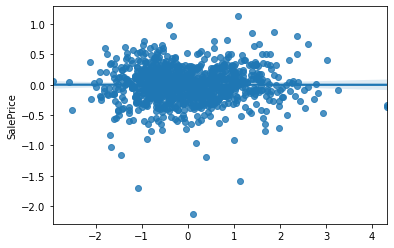

In [48]:
#plotting residual and y_train for linearity
res = (y_train - y_train_pred)
sns.regplot(y_train_pred,res)

<AxesSubplot:xlabel='SalePrice'>

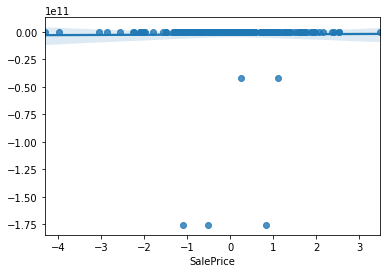

In [49]:
# Plotting y_test and y_test_pred to understand the spread (Homoscedacity)

fig = plt.figure()
sns.regplot(y_test, y_test_pred)

### From R2 score and failure of assumptions, we can identify overfitting, so we will go with regularization

### 2 ) Regularization

### Ridge Regression

#### RFE is Used: Since ridge regression does not have a kind of automated feature elmination like Lasso, we will use the RFE selected features.

#### A) Initial model without gridseach - Ridge(alpha=0.001) without GridSearch

In [50]:
#ridge
ridge1 = Ridge(alpha=0.001)
ridge1.fit(X_train_rfe,y_train)

# train score
y_train_pred = ridge1.predict(X_train_rfe)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

# test score
y_test_pred  = ridge1.predict(X_test_rfe)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

#printing coeff of all columns
list(zip(X_train_rfe.columns,ridge1.coef_))

0.9168700151801475
0.8788447987024002


[('OverallQual', 0.2476664336319762),
 ('OverallCond', 0.1555300068241986),
 ('BsmtFinSF1', 0.11912198303706183),
 ('BsmtFinSF2', 0.010245020758700301),
 ('BsmtUnfSF', 0.0030952304124868425),
 ('TotalBsmtSF', 0.14338015611257934),
 ('1stFlrSF', 0.1239436898811984),
 ('2ndFlrSF', 0.16169439639394828),
 ('LowQualFinSF', 0.007000637979331787),
 ('GrLivArea', 0.23658555457320143),
 ('GarageYrBlt', 0.03467838033116498),
 ('garage_age', -0.03467838043538515),
 ('selling_Age', -0.17874420053125586),
 ('MSZoning_FV', 0.32415485036317965),
 ('MSZoning_RH', 0.09606703820736585),
 ('MSZoning_RL', 0.1919747024687413),
 ('LandSlope_Sev', -0.2951218773889186),
 ('Neighborhood_ClearCr', 0.173347874493414),
 ('Neighborhood_Crawfor', 0.3907127825043067),
 ('Neighborhood_IDOTRR', 0.13567623811916513),
 ('Neighborhood_NridgHt', 0.22894764863798572),
 ('Neighborhood_Veenker', 0.20791779731575524),
 ('Condition1_Norm', 0.11333978936939536),
 ('Condition1_PosN', 0.1434711188354288),
 ('BldgType_Duplex', -0.

### There might be Better scores for other values of alpha, hence using gridsearchcv for finding the optimal value of Alpha

### B) GridSearch for finding optimal value of alpha

In [51]:
## list of alphas (lambda parameter): Ridge Regression Model

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0,11,12,13,14,15,16,17,18,19,20, 50, 100, 500, 1000 ]}

ridge2 = Ridge()

##Cross-Validation

folds = 5
ridge_model = GridSearchCV(estimator = ridge2, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 11, 12, 13, 14, 15,
                                   16, 17, 18, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [52]:
ridge_result = pd.DataFrame(ridge_model.cv_results_)
ridge_result.sort_values(by = ['rank_test_score'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
15,0.000000,0.000000,0.003270,0.006539,4.0,{'alpha': 4.0},-0.211888,-0.216863,-0.207293,-0.259399,-0.217743,-0.222637,0.018760,1,-0.213668,-0.212519,-0.214903,-0.204524,-0.211087,-0.211340,0.003634
14,0.000127,0.000253,0.000000,0.000000,3.0,{'alpha': 3.0},-0.211457,-0.216597,-0.206991,-0.260388,-0.217810,-0.222649,0.019260,2,-0.213266,-0.212051,-0.214381,-0.203885,-0.210530,-0.210823,0.003698
16,0.003439,0.006632,0.000000,0.000000,5.0,{'alpha': 5.0},-0.212356,-0.217092,-0.207586,-0.258571,-0.217742,-0.222670,0.018320,3,-0.214063,-0.212961,-0.215364,-0.205065,-0.211591,-0.211809,0.003594
17,0.001357,0.002715,0.004125,0.006311,6.0,{'alpha': 6.0},-0.212911,-0.217312,-0.208021,-0.257889,-0.217722,-0.222771,0.017907,4,-0.214476,-0.213372,-0.215816,-0.205598,-0.212080,-0.212268,0.003556
13,0.000109,0.000217,0.003141,0.006281,2.0,{'alpha': 2.0},-0.211299,-0.216353,-0.206937,-0.261578,-0.217906,-0.222815,0.019764,5,-0.212842,-0.211553,-0.213784,-0.203210,-0.209881,-0.210254,0.003758
18,0.003282,0.006564,0.000000,0.000000,7.0,{'alpha': 7.0},-0.213440,-0.217508,-0.208615,-0.257285,-0.217716,-0.222913,0.017503,6,-0.214888,-0.213846,-0.216264,-0.206102,-0.212555,-0.212731,0.003531
19,0.000000,0.000000,0.011731,0.006490,8.0,{'alpha': 8.0},-0.213938,-0.217694,-0.209208,-0.256816,-0.217723,-0.223076,0.017157,7,-0.215340,-0.214329,-0.216701,-0.206606,-0.213056,-0.213206,0.003510
20,0.003455,0.006664,0.000000,0.000000,9.0,{'alpha': 9.0},-0.214446,-0.217870,-0.209780,-0.256502,-0.217725,-0.223265,0.016877,8,-0.215779,-0.214862,-0.217105,-0.207093,-0.213565,-0.213681,0.003491
12,0.009751,0.007981,0.000199,0.000397,1.0,{'alpha': 1.0},-0.211481,-0.216607,-0.207268,-0.263086,-0.218694,-0.223427,0.020226,9,-0.212332,-0.210985,-0.213336,-0.202508,-0.209256,-0.209684,0.003840
21,0.009263,0.006360,0.005542,0.005647,10.0,{'alpha': 10.0},-0.214941,-0.218033,-0.210309,-0.256313,-0.217803,-0.223480,0.016651,10,-0.216225,-0.215385,-0.217486,-0.207561,-0.214080,-0.214147,0.003475


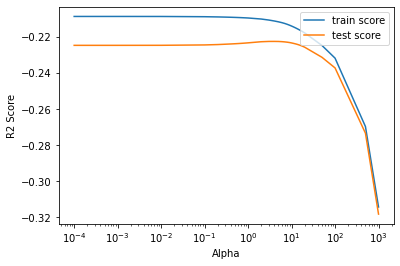

In [53]:
plt.plot(ridge_result['param_alpha'], ridge_result['mean_train_score'])
plt.plot(ridge_result['param_alpha'], ridge_result['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [54]:
# getting the best estimator for lambda

ridge_model.best_estimator_

Ridge(alpha=4.0)

### The optimal lambda value for ridge regression is 4.0
### Building a Model with Alpha = 4.0

In [55]:
##Checking the coefficient values with lambda (alpha) = 4

ridge = Ridge(alpha=4)

ridge.fit(X_train_rfe, y_train)
print("Intercept: ", ridge.intercept_)
list(zip(X_train_rfe.columns,ridge1.coef_))

Intercept:  -0.5453546206683497


[('OverallQual', 0.2476664336319762),
 ('OverallCond', 0.1555300068241986),
 ('BsmtFinSF1', 0.11912198303706183),
 ('BsmtFinSF2', 0.010245020758700301),
 ('BsmtUnfSF', 0.0030952304124868425),
 ('TotalBsmtSF', 0.14338015611257934),
 ('1stFlrSF', 0.1239436898811984),
 ('2ndFlrSF', 0.16169439639394828),
 ('LowQualFinSF', 0.007000637979331787),
 ('GrLivArea', 0.23658555457320143),
 ('GarageYrBlt', 0.03467838033116498),
 ('garage_age', -0.03467838043538515),
 ('selling_Age', -0.17874420053125586),
 ('MSZoning_FV', 0.32415485036317965),
 ('MSZoning_RH', 0.09606703820736585),
 ('MSZoning_RL', 0.1919747024687413),
 ('LandSlope_Sev', -0.2951218773889186),
 ('Neighborhood_ClearCr', 0.173347874493414),
 ('Neighborhood_Crawfor', 0.3907127825043067),
 ('Neighborhood_IDOTRR', 0.13567623811916513),
 ('Neighborhood_NridgHt', 0.22894764863798572),
 ('Neighborhood_Veenker', 0.20791779731575524),
 ('Condition1_Norm', 0.11333978936939536),
 ('Condition1_PosN', 0.1434711188354288),
 ('BldgType_Duplex', -0.

In [56]:
# predicting training set
y_train_pred = ridge.predict(X_train_rfe)

#predicting test set
y_test_pred  = ridge.predict(X_test_rfe)

In [57]:
##R2 score for Lasso Regression Model
r2_score_lasso_train = r2_score(y_true= y_train, y_pred= y_train_pred)
r2_score_lasso_test = r2_score(y_true= y_test, y_pred= y_test_pred)

##Check the mean squared error (MSE) for Lasso Regression Model
MSE_lasso_train = mean_squared_error(y_train, y_train_pred)
MSE_lasso_test = mean_squared_error(y_test, y_test_pred)

##Root Mean Squared Error for Train and Test Sets
RMSE_lasso_train = np.sqrt(MSE_lasso_train)
RMSE_lasso_test = np.sqrt(MSE_lasso_test)

print("Ridge Regression Model (alpha=4):\n")
print("\nFor Train Set:\nR2 score:",r2_score_lasso_train,"\nMSE score:",MSE_lasso_train,"\nRMSE score:",RMSE_lasso_train)
print("\nFor Test Set:\nR2 score:",r2_score_lasso_test,"\nMSE score:",MSE_lasso_test,"\nRMSE score:",RMSE_lasso_test,"\n")

Ridge Regression Model (alpha=4):


For Train Set:
R2 score: 0.9155917554585343 
MSE score: 0.08440824454146563 
RMSE score: 0.2905309700212107

For Test Set:
R2 score: 0.8838394363239533 
MSE score: 0.13277783265126003 
RMSE score: 0.3643869271135561 



### Model Evaluation of Ridge Regression model(Verifying assumptions of Linear regression)

1. Linearity of the model
2. Homoscedacity
3. Error terms are independent of each other
4. Error terms normal distribution
5. Multicollineraity

#### 1. Linearity of the model

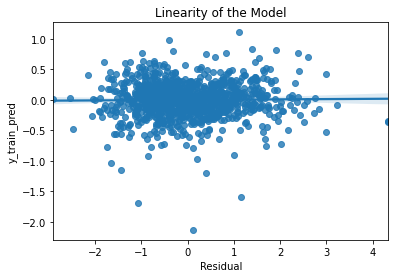

In [58]:
#plotting residual and y_train
res = (y_train - y_train_pred)
sns.regplot(y_train_pred,res)
plt.title("Linearity of the Model")
plt.ylabel("y_train_pred")
plt.xlabel("Residual")
plt.show()

### The model is observed to be linear
   

#### 2. Homoscedacity

Text(0, 0.5, 'y_pred')

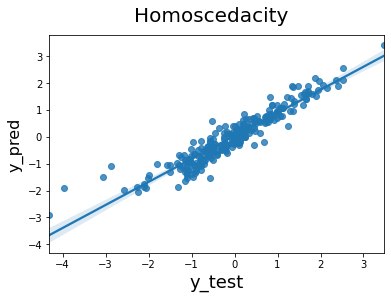

In [59]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
sns.regplot(y_test, y_test_pred)
fig.suptitle('Homoscedacity', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

### Error terms have constant variance, thus it is verified

#### 3. Error terms should be independent

Text(0, 0.5, 'Error Terms')

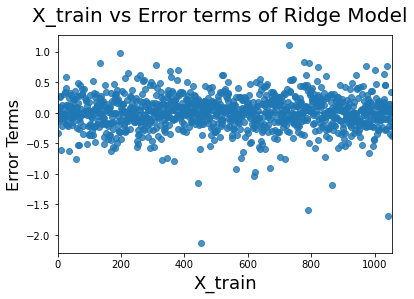

In [60]:
# Plotting y_test and y_test_pred to understand the spread o

fig = plt.figure()

#changing to 1D since Xtrain is not 1D
temp = [i for i in range(0,len(X_train_rfe),1)]

#plotting
sns.regplot(temp, res)
fig.suptitle('X_train vs Error terms of Ridge Model', fontsize = 20)              # Plot heading 
plt.xlabel('X_train', fontsize = 18)                          # X-label
plt.ylabel('Error Terms', fontsize = 16)

### Error terms are independent of each other

#### 4. Normal Distribution of error terms

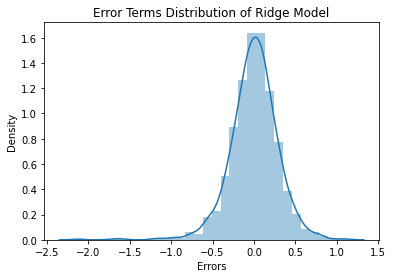

In [61]:
# Plot the histogram of the error terms
res = (y_train - y_train_pred)     #residuals
sns.distplot(res , bins = 30)
plt.title('Error Terms Distribution of Ridge Model')               
plt.xlabel('Errors') 
plt.show()

#### 5. Multicollinearity (AutoCorrelation check)

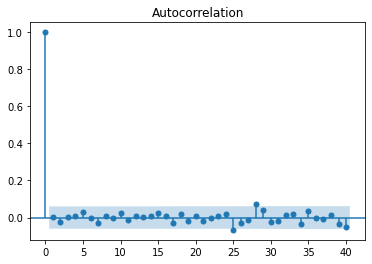

In [62]:
import statsmodels.tsa.api as smt
autocor = smt.graphics.plot_acf(res, lags=40 , alpha=0.05)
autocor.show()

###### All the Assumptions are verified

### Analysing/finding the Top Features from Ridge

In [63]:
##Creating a dataframe of features and coefficients

ridge_df = pd.DataFrame({'Features':X_train_rfe.columns, 'Coefficient':ridge.coef_.round(4), 
                         'Absolute value':abs(ridge.coef_.round(4))})

##Sorting coefficient in descending order of absolute values and reset index
ridge_df = ridge_df.sort_values(by='Absolute value', ascending=False)
ridge_df.reset_index(drop=True, inplace=True)  
top5_ridge = ridge_df.Features[0:5]
print('The Top 5 Features as per Ridge model is\n',top5_ridge)

#Dataframe rdige_df
ridge_df.head(10)  #Top10

The Top 5 Features as per Ridge model is
 0    Neighborhood_Crawfor
1          BldgType_Twnhs
2             MSZoning_FV
3         BldgType_Duplex
4             OverallQual
Name: Features, dtype: object


,Features,Coefficient,Absolute value
0,Neighborhood_Crawfor,0.3512,0.3512
1,BldgType_Twnhs,-0.3490,0.3490
2,MSZoning_FV,0.2804,0.2804
3,BldgType_Duplex,-0.2606,0.2606
4,OverallQual,0.2548,0.2548
5,GrLivArea,0.2364,0.2364
6,Neighborhood_NridgHt,0.1964,0.1964
7,MSZoning_RL,0.1844,0.1844
8,selling_Age,-0.1763,0.1763
9,BsmtExposure_Gd,0.1743,0.1743


### Lasso Regression
#### A) Initial model without GridSearch - Lasso(alpha=0.001) without GridSearch
#### No RFE used- Lasso Does not require RFE selected columns generally, because it can push the coefficients to zero, thus it makes an automated feature selection.

In [64]:
#Lasso model
lasso1 = Lasso(alpha=0.001)
lasso1.fit(X_train,y_train)

# train score
y_train_pred = lasso1.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

# test score
y_test_pred  = lasso1.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))
print(len(lasso1.coef_))
#printing coeff of all columns
list(zip(X_train.columns,lasso1.coef_))

0.9392550802135856
0.8947411576440373
197


[('MSSubClass', -0.024763813948287212),
 ('LotFrontage', 0.02379298667682352),
 ('LotArea', 0.05442125197509419),
 ('OverallQual', 0.17502889118895673),
 ('OverallCond', 0.13558026577443688),
 ('MasVnrArea', 0.014731748025322264),
 ('BsmtFinSF1', 0.07156456703897164),
 ('BsmtFinSF2', 0.015338800585758029),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 0.11536655199165662),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.02950190822977197),
 ('LowQualFinSF', -0.00842237442369882),
 ('GrLivArea', 0.29926897957903087),
 ('BsmtFullBath', 0.029033300591261076),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.0024433364363932665),
 ('HalfBath', 0.014788531869552089),
 ('BedroomAbvGr', -0.016381222192251903),
 ('KitchenAbvGr', -0.04340730453377828),
 ('TotRmsAbvGrd', 0.0481716590200447),
 ('Fireplaces', 0.03640195866640445),
 ('GarageYrBlt', 0.0),
 ('GarageCars', 0.053486768920408205),
 ('GarageArea', 0.025039992693564064),
 ('WoodDeckSF', 0.020309178677429117),
 ('OpenPorchSF', 0.026483716130293662),
 ('EnclosedPorch'

##### B) Lasso GridSearch for finding optimal value of alpha

In [65]:
# Gridsearch Operation on Training data set
##Lasso Regression Model. 
lasso2 = Lasso()

##List of alphas (lambda parameter)

params = {'alpha': [0.00001, 0.0001, 0.0002, 0.0003, 0.0005, 0.0006, 0.0007,0.0008, 0.0009, 0.001, 0.002,0.003,0.004, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                      0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

##Cross-Validation

folds = 5
lasso_cv = GridSearchCV(estimator = lasso2,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.0002, 0.0003, 0.0005,
                                   0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.002,
                                   0.003, 0.004, 0.005, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [66]:
lasso_result = pd.DataFrame(lasso_cv.cv_results_)
lasso_result.sort_values(by = ['rank_test_score'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
7,0.047140,0.013299,0.003144,0.006287,0.0008,{'alpha': 0.0008},-0.189986,-0.208401,-0.187445,-0.210624,-0.207143,-0.200720,0.009897,1,-0.172512,-0.171508,-0.172529,-0.170634,-0.167909,-0.171019,0.001707
6,0.071172,0.038097,0.004192,0.006375,0.0007,{'alpha': 0.0007},-0.190169,-0.208906,-0.186460,-0.210539,-0.207997,-0.200814,0.010305,2,-0.171148,-0.170478,-0.171391,-0.169371,-0.166895,-0.169857,0.001638
8,0.045055,0.012183,0.006362,0.007794,0.0009,{'alpha': 0.0009},-0.189901,-0.208121,-0.188748,-0.210878,-0.206472,-0.200824,0.009501,3,-0.173716,-0.172346,-0.173539,-0.171622,-0.168861,-0.172017,0.001757
9,0.077903,0.028175,0.006539,0.008016,0.001,{'alpha': 0.001},-0.189895,-0.207781,-0.189981,-0.211356,-0.205754,-0.200953,0.009171,4,-0.174738,-0.173188,-0.174412,-0.172661,-0.169709,-0.172942,0.001788
5,0.080432,0.027213,0.003399,0.006799,0.0006,{'alpha': 0.0006},-0.190280,-0.209559,-0.185466,-0.211052,-0.209003,-0.201072,0.010905,5,-0.169795,-0.169376,-0.170437,-0.168051,-0.165845,-0.168701,0.001628
4,0.058180,0.013291,0.000000,0.000000,0.0005,{'alpha': 0.0005},-0.190716,-0.210008,-0.184830,-0.211695,-0.209998,-0.201449,0.011338,6,-0.168014,-0.168110,-0.169325,-0.166709,-0.164371,-0.167306,0.001685
10,0.045263,0.012294,0.000000,0.000000,0.002,{'alpha': 0.002},-0.191459,-0.206668,-0.196044,-0.215062,-0.202757,-0.202398,0.008231,7,-0.182364,-0.179087,-0.180401,-0.179435,-0.176929,-0.179643,0.001772
3,0.105259,0.044111,0.003251,0.006502,0.0003,{'alpha': 0.0003},-0.192635,-0.212098,-0.185648,-0.212223,-0.211276,-0.202776,0.011354,8,-0.165558,-0.164986,-0.165110,-0.163342,-0.160370,-0.163873,0.001906
2,0.065738,0.003261,0.003802,0.004699,0.0002,{'alpha': 0.0002},-0.193218,-0.211683,-0.189498,-0.213202,-0.211521,-0.203824,0.010263,9,-0.163501,-0.163031,-0.162411,-0.161370,-0.158371,-0.161737,0.001828
11,0.044889,0.015837,0.003128,0.006255,0.003,{'alpha': 0.003},-0.194076,-0.208525,-0.201646,-0.217508,-0.202985,-0.204948,0.007791,10,-0.187512,-0.184615,-0.185419,-0.183679,-0.182033,-0.184652,0.001821


##### Alpha 0.0008 seems to be optimal for this model, we will check with visualization for confirmation

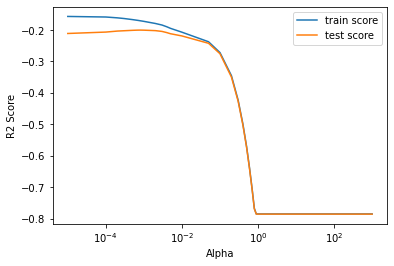

In [67]:
plt.plot(lasso_result['param_alpha'], lasso_result['mean_train_score'])
plt.plot(lasso_result['param_alpha'], lasso_result['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [68]:
# getting the best estimator for lambda

lasso_cv.best_estimator_

Lasso(alpha=0.0008)

In [69]:
# check the coefficient values with lambda = 0.0008

lasso = Lasso(alpha=0.0008)
        
lasso.fit(X_train, y_train) 
print("Intercept: ",lasso.intercept_)
print("Coefficients:\n ",lasso.coef_)

Intercept:  -0.3599384932207901
Coefficients:
  [-0.02551386  0.02406263  0.05504003  0.16960297  0.13450002  0.01489465
  0.07022954  0.01706808 -0.          0.11718137  0.          0.03577741
 -0.00839319  0.29421266  0.02878446  0.          0.00304826  0.0150382
 -0.01555929 -0.04073269  0.04774487  0.03512509  0.          0.05256972
  0.02570077  0.02069225  0.02705168  0.01197834  0.01050086  0.03713822
  0.00340977 -0.01826465 -0.03814789 -0.02132505 -0.14243962  0.18496628
  0.          0.05812044 -0.06330472  0.         -0.         -0.0169389
  0.         -0.01470216 -0.02210604  0.05848184 -0.         -0.
 -0.00090958 -0.         -0.02023886  0.         -0.00673006  0.16276623
  0.         -0.02555905  0.32169079 -0.10997393 -0.05120067  0.
 -0.15686338 -0.04919348 -0.06444573  0.         -0.0538425   0.
  0.10009123 -0.01065213 -0.          0.         -0.          0.02619185
  0.29018212 -0.          0.          0.06130052  0.14088033 -0.
  0.09076424 -0.06541203  0.         

In [70]:
# predicting training set
y_train_pred = lasso.predict(X_train)

#predicting test set
y_test_pred  = lasso.predict(X_test)

In [71]:
##R2 score for Lasso Regression Model
r2_score_lasso_train = r2_score(y_true= y_train, y_pred= y_train_pred)
r2_score_lasso_test = r2_score(y_true= y_test, y_pred= y_test_pred)

##Check the mean squared error (MSE) for Lasso Regression Model
MSE_lasso_train = mean_squared_error(y_train, y_train_pred)
MSE_lasso_test = mean_squared_error(y_test, y_test_pred)

##Root Mean Squared Error for Train and Test Sets
RMSE_lasso_train = np.sqrt(MSE_lasso_train)
RMSE_lasso_test = np.sqrt(MSE_lasso_test)

print("Lasso Regression Model (alpha=0.0008):\n")
print("\nFor Train Set:\nR2 score:",r2_score_lasso_train,"\nMSE score:",MSE_lasso_train,"\nRMSE score:",RMSE_lasso_train)
print("\nFor Test Set:\nR2 score:",r2_score_lasso_test,"\nMSE score:",MSE_lasso_test,"\nRMSE score:",RMSE_lasso_test,"\n")

Lasso Regression Model (alpha=0.0008):


For Train Set:
R2 score: 0.9405093314944781 
MSE score: 0.059490668505521864 
RMSE score: 0.24390708990417204

For Test Set:
R2 score: 0.8955132345880263 
MSE score: 0.11943404726266275 
RMSE score: 0.3455923136625911 



### Model Evaluation of Lasso Regression model(Verifying assumptions of Linear regression)

1. Linearity of the model
2. Homoscedacity
3. Error terms are independent of each other
4. Error terms normal distribution

#### 1. Linearity of the model

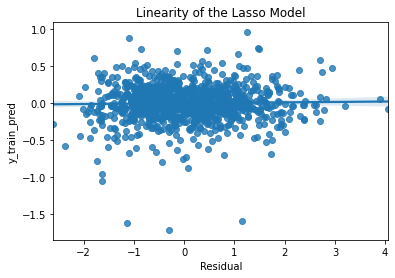

In [72]:
#plotting residual and y_train of Lasso
res = (y_train - y_train_pred)
sns.regplot(y_train_pred,res)
plt.title("Linearity of the Lasso Model")
plt.ylabel("y_train_pred")
plt.xlabel("Residual")
plt.show()

### The model is observed to be linear

#### 2. Homoscedacity

Text(0, 0.5, 'y_pred')

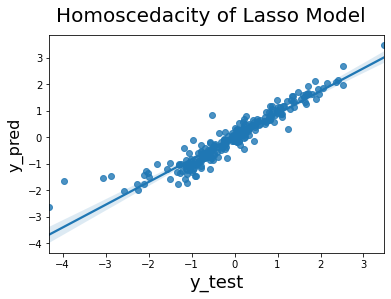

In [73]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
sns.regplot(y_test, y_test_pred)
fig.suptitle('Homoscedacity of Lasso Model', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

### Error terms have constant variance, thus it is verified

#### 3. Error terms should be independent

Text(0, 0.5, 'Error Terms')

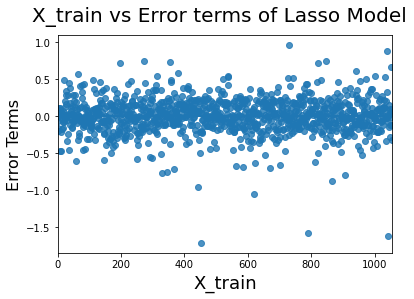

In [74]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()

#changing to 1D since Xtrain is not 1D
temp = [i for i in range(0,len(X_train),1)]

#plotting
sns.regplot(temp, res)
fig.suptitle('X_train vs Error terms of Lasso Model', fontsize = 20)              # Plot heading 
plt.xlabel('X_train', fontsize = 18)                          # X-label
plt.ylabel('Error Terms', fontsize = 16)

### Error terms are independent of each other

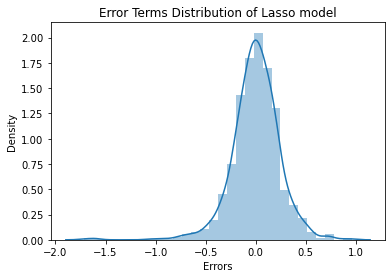

In [75]:
# Plot the histogram of the error terms
res = (y_train - y_train_pred)     #residuals
sns.distplot(res , bins = 30)
plt.title('Error Terms Distribution of Lasso model')               
plt.xlabel('Errors') 
plt.show()

#### 5. Multicollinearity (AutoCorrelation check)

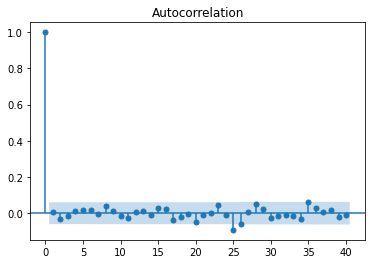

In [76]:
import statsmodels.tsa.api as smt
autocor = smt.graphics.plot_acf(res, lags=40 , alpha=0.05)
autocor.show()

###### All the Assumptions are verified

### Analysing/Finding the Top Features from Lasso

In [77]:
##Creating a dataframe of features and coefficients

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4), 
                         'Absolute value':abs(lasso.coef_.round(4))})

##Sorting coefficient in descending order of absolute values and reset index
lasso_df = lasso_df.sort_values(by='Absolute value', ascending=False)
lasso_df.reset_index(drop=True, inplace=True)
top5_lasso = lasso_df.Features[0:5]
print('The Top 5 Features as per Lasso model is\n', top5_lasso)

#Dataframe lasso_df
lasso_df.head(10)  #Top10

The Top 5 Features as per Lasso model is
 0    Neighborhood_Crawfor
1               GrLivArea
2    Neighborhood_StoneBr
3     Exterior1st_BrkFace
4             MSZoning_FV
Name: Features, dtype: object


,Features,Coefficient,Absolute value
0,Neighborhood_Crawfor,0.3217,0.3217
1,GrLivArea,0.2942,0.2942
2,Neighborhood_StoneBr,0.2902,0.2902
3,Exterior1st_BrkFace,0.2108,0.2108
4,MSZoning_FV,0.1850,0.1850
5,OverallQual,0.1696,0.1696
6,Neighborhood_BrkSide,0.1628,0.1628
7,Neighborhood_MeadowV,-0.1569,0.1569
8,SaleCondition_Normal,0.1454,0.1454
9,selling_Age,-0.1424,0.1424


# <center> Conclusion of Problem Statement Part - I </center>

#### Top 10 Variables Significant in Predicting the house Price and their magnitude on how well they describe the price

##### As per Ridge Model:

1.	Neighborhood_Crawfor :0.3512
2.	BldgType_Twnhs	     :0.3490
3.	MSZoning_FV	         :0.2804
4.	BldgType_Duplex	     :0.2606
5.	OverallQual	         :0.2548
6.	GrLivArea	         :0.2364
7.	Neighborhood_NridgHt :0.1964
8.	MSZoning_RL	         :0.1844
9.	selling_Age	         : -0.1763
10.	BsmtExposure_Gd	     :0.1743

##### As per Lasso Model:

1.	Neighborhood_Crawfor	:0.3217
2.	GrLivArea	            :0.2942
3.	Neighborhood_StoneBr	:0.2902
4.	Exterior1st_BrkFace	    :0.2108
5.	MSZoning_FV	            :0.1850
6.	OverallQual	            :0.1696
7.	Neighborhood_BrkSide	:0.1628
8.	Neighborhood_MeadowV	: -0.1569
9.	SaleCondition_Normal	:0.1454
10.	selling_Age	            : -0.1424

#### Optimal Value of Lambda for Lasso and Ridge are,

- Lasso : 0.0008
- Ridge : 4.0

#### Best model and model parameters

###### Lasso Seems to have better train and test R2 value,

- R2 Score for training data: 0.9405093314944781
- R2 score for Test data: 0.8955132345880263 

# <center> Problem Statement Part - II </center>

1. Doubled alpha rate
2. Removing top 5 features, and identifying next 5 potentital features
3. Other explanations are provided in the document present in the Github Repository

## 1. Looking Models at doubled alpha rate:

### Ridge Regression with doubled alpha rate (alpha=8)

In [78]:
##Checking the coefficient values with lambda (alpha) = 8

ridge = Ridge(alpha=8)

ridge.fit(X_train_rfe, y_train)

# predicting training set
y_train_pred = ridge.predict(X_train_rfe)

#predicting test set
y_test_pred  = ridge.predict(X_test_rfe)

##R2 score for Lasso Regression Model
r2_score_lasso_train = r2_score(y_true= y_train, y_pred= y_train_pred)
r2_score_lasso_test = r2_score(y_true= y_test, y_pred= y_test_pred)

##Check the mean squared error (MSE) for Lasso Regression Model
MSE_lasso_train = mean_squared_error(y_train, y_train_pred)
MSE_lasso_test = mean_squared_error(y_test, y_test_pred)

##Root Mean Squared Error for Train and Test Sets
RMSE_lasso_train = np.sqrt(MSE_lasso_train)
RMSE_lasso_test = np.sqrt(MSE_lasso_test)

print("Ridge Regression Model with doubled alpha rate (alpha=8):\n")
print("\nFor Train Set:\nR2 score:",r2_score_lasso_train,"\nMSE score:",MSE_lasso_train,"\nRMSE score:",RMSE_lasso_train)
print("\nFor Test Set:\nR2 score:",r2_score_lasso_test,"\nMSE score:",MSE_lasso_test,"\nRMSE score:",RMSE_lasso_test,"\n")

Ridge Regression Model with doubled alpha rate (alpha=8):


For Train Set:
R2 score: 0.9144691354622632 
MSE score: 0.08553086453773687 
RMSE score: 0.29245660282807234

For Test Set:
R2 score: 0.8844449598207201 
MSE score: 0.13208568641009397 
RMSE score: 0.36343594540179147 



In [79]:
##Creating a dataframe of features and coefficients

ridge_df = pd.DataFrame({'Features':X_train_rfe.columns, 'Coefficient':ridge.coef_.round(4), 
                         'Absolute value':abs(ridge.coef_.round(4))})

##Sorting coefficient in descending order of absolute values and reset index
ridge_df = ridge_df.sort_values(by='Absolute value', ascending=False)
ridge_df.reset_index(drop=True, inplace=True)  

#Dataframe rdige_df
ridge_df.head(10)  #Top10

,Features,Coefficient,Absolute value
0,Neighborhood_Crawfor,0.3192,0.3192
1,BldgType_Twnhs,-0.3094,0.3094
2,OverallQual,0.2585,0.2585
3,MSZoning_FV,0.2460,0.2460
4,GrLivArea,0.2367,0.2367
5,BldgType_Duplex,-0.2217,0.2217
6,MSZoning_RL,0.1781,0.1781
7,Neighborhood_NridgHt,0.1749,0.1749
8,selling_Age,-0.1741,0.1741
9,BsmtExposure_Gd,0.1634,0.1634


### Lasso Regression with doubled alpha rate (alpha=0.0016)

In [80]:
# check the coefficient values with lambda = 0.0016

lasso = Lasso(alpha=0.0016)
        
lasso.fit(X_train, y_train) 

# predicting training set
y_train_pred = lasso.predict(X_train)

#predicting test set
y_test_pred  = lasso.predict(X_test)

##R2 score for Lasso Regression Model
r2_score_lasso_train = r2_score(y_true= y_train, y_pred= y_train_pred)
r2_score_lasso_test = r2_score(y_true= y_test, y_pred= y_test_pred)

##Check the mean squared error (MSE) for Lasso Regression Model
MSE_lasso_train = mean_squared_error(y_train, y_train_pred)
MSE_lasso_test = mean_squared_error(y_test, y_test_pred)

##Root Mean Squared Error for Train and Test Sets
RMSE_lasso_train = np.sqrt(MSE_lasso_train)
RMSE_lasso_test = np.sqrt(MSE_lasso_test)

print("Lasso Regression Model with doubled alpha rate (alpha=0.0016):\n")
print("\nFor Train Set:\nR2 score:",r2_score_lasso_train,"\nMSE score:",MSE_lasso_train,"\nRMSE score:",RMSE_lasso_train)
print("\nFor Test Set:\nR2 score:",r2_score_lasso_test,"\nMSE score:",MSE_lasso_test,"\nRMSE score:",RMSE_lasso_test,"\n")

Lasso Regression Model with doubled alpha rate (alpha=0.0016):


For Train Set:
R2 score: 0.9365333297401836 
MSE score: 0.06346667025981641 
RMSE score: 0.25192592216724424

For Test Set:
R2 score: 0.8935283322513238 
MSE score: 0.12170289842825102 
RMSE score: 0.34885942502425105 



In [81]:
##Creating a dataframe of features and coefficients

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4), 
                         'Absolute value':abs(lasso.coef_.round(4))})

##Sorting coefficient in descending order of absolute values and reset index
lasso_df = lasso_df.sort_values(by='Absolute value', ascending=False)
lasso_df.reset_index(drop=True, inplace=True)

#Dataframe lasso_df
lasso_df.head(10)  #Top10

,Features,Coefficient,Absolute value
0,GrLivArea,0.3129,0.3129
1,Neighborhood_Crawfor,0.3069,0.3069
2,Neighborhood_StoneBr,0.2406,0.2406
3,OverallQual,0.1872,0.1872
4,Exterior1st_BrkFace,0.1851,0.1851
5,Neighborhood_BrkSide,0.1477,0.1477
6,OverallCond,0.1368,0.1368
7,selling_Age,-0.1352,0.1352
8,SaleCondition_Normal,0.1260,0.1260
9,MSZoning_RM,-0.1244,0.1244


### 2. Removing Top 5 features and Identifying the new potential top 5 features

### Lasso Regression after removing top 5 features (alpha=0.0008)

In [82]:
# removing top 5 features of Lasso regression from X_train and X_test
X_train = X_train.drop(top5_lasso,axis=1)
X_test = X_test.drop(top5_lasso,axis=1)

In [83]:
# check the coefficient values with lambda = 0.0016

lasso = Lasso(alpha=0.0008)
        
lasso.fit(X_train, y_train) 

# predicting training set
y_train_pred = lasso.predict(X_train)

#predicting test set
y_test_pred  = lasso.predict(X_test)

##R2 score for Lasso Regression Model
r2_score_lasso_train = r2_score(y_true= y_train, y_pred= y_train_pred)
r2_score_lasso_test = r2_score(y_true= y_test, y_pred= y_test_pred)

##Check the mean squared error (MSE) for Lasso Regression Model
MSE_lasso_train = mean_squared_error(y_train, y_train_pred)
MSE_lasso_test = mean_squared_error(y_test, y_test_pred)

##Root Mean Squared Error for Train and Test Sets
RMSE_lasso_train = np.sqrt(MSE_lasso_train)
RMSE_lasso_test = np.sqrt(MSE_lasso_test)

print("Lasso Regression Model (alpha=0.0008):\n")
print("\nFor Train Set:\nR2 score:",r2_score_lasso_train,"\nMSE score:",MSE_lasso_train,"\nRMSE score:",RMSE_lasso_train)
print("\nFor Test Set:\nR2 score:",r2_score_lasso_test,"\nMSE score:",MSE_lasso_test,"\nRMSE score:",RMSE_lasso_test,"\n")

Lasso Regression Model (alpha=0.0008):


For Train Set:
R2 score: 0.9372443390185952 
MSE score: 0.0627556609814048 
RMSE score: 0.25051080012926547

For Test Set:
R2 score: 0.8891703574272756 
MSE score: 0.1266843003220953 
RMSE score: 0.3559273806861384 



In [84]:
##Creating a dataframe of features and coefficients

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4), 
                         'Absolute value':abs(lasso.coef_.round(4))})

##Sorting coefficient in descending order of absolute values and reset index
lasso_df = lasso_df.sort_values(by='Absolute value', ascending=False)
lasso_df.reset_index(drop=True, inplace=True) 
top5_lasso = lasso_df.Features[0:5]
print('The Top 5 Features as per Lasso model is\n',top5_lasso)

#Dataframe lasso_df
lasso_df.head(10)  #Top10

The Top 5 Features as per Lasso model is
 0                2ndFlrSF
1    Neighborhood_MeadowV
2                1stFlrSF
3    Neighborhood_Edwards
4             OverallQual
Name: Features, dtype: object


,Features,Coefficient,Absolute value
0,2ndFlrSF,0.2930,0.2930
1,Neighborhood_MeadowV,-0.2693,0.2693
2,1stFlrSF,0.2328,0.2328
3,Neighborhood_Edwards,-0.2226,0.2226
4,OverallQual,0.1802,0.1802
5,CentralAir_Y,0.1681,0.1681
6,Neighborhood_NAmes,-0.1633,0.1633
7,Neighborhood_OldTown,-0.1556,0.1556
8,SaleCondition_Normal,0.1543,0.1543
9,Neighborhood_Gilbert,-0.1512,0.1512


#### After removing the top 5 features and building the Lasso model again, the new potential top 5 features are,
1.                2ndFlrSF
2.    Neighborhood_MeadowV
3.                1stFlrSF
4.    Neighborhood_Edwards
5.             OverallQual
